##Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [52]:
# read data, [569 32] pandas -> [569 31] ndarray
data = pd.read_csv("data.csv", index_col=0)
data["diagnosis"] = data["diagnosis"].replace({"M": 1, "B": 0})
data = data.to_numpy()[:, :-1]

# normolization
min_index = np.min(data, axis=0)
max_index = np.max(data, axis=0)
data = (data - min_index) / (max_index - min_index)

# split to train and test
data_train = data[:int(np.size(data) * 0.8), 1:]

# split sample and label
X_train = data[:int(np.size(data) * 0.8), 1:], data[:, 0]
X, Y = data[:, 1:], data[:, 0]

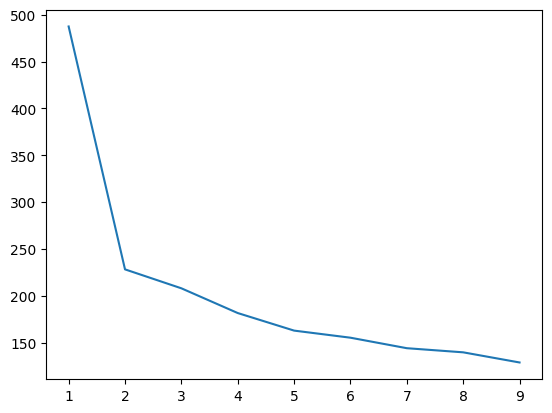

In [53]:
# why we choose cluster = 2 for non supervise learning, i.e., k-mean
inertia_list = []
for i in range(1, 10):
    kmean = KMeans(n_clusters=i, n_init="auto")
    kmean.fit(data, Y)
    inertia_list.append(kmean.inertia_)
plt.plot(range(1, 10), inertia_list)
plt.show()

In [56]:
kmean = KMeans(n_clusters=2, n_init="auto")
kmean.fit(X, Y)  # 569 * 30
predi = kmean.predict(X, Y)


##Using PCA to reduce dimensionality to 2 and visulization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


569


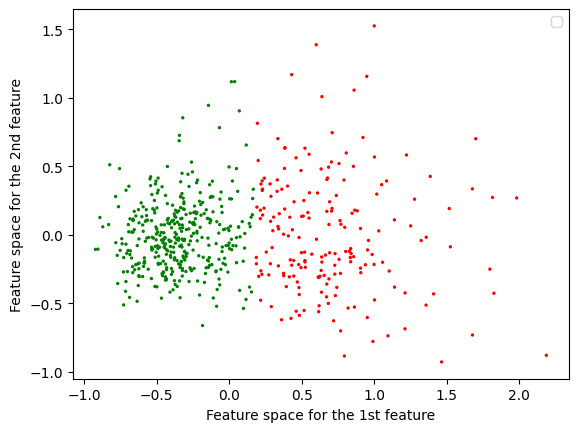

In [57]:
pca = PCA(n_components=2)
data_2f = pca.fit_transform(X)

color = ("green", "red")
color_set = [color[l] for l in predi]

print(len(color_set))

fig, ax = plt.subplots()
ax.scatter(data_2f[:, 0], data_2f[:, 1], s=2, color=color_set)
plt.xlabel('Feature space for the 1st feature')
plt.ylabel('Feature space for the 2nd feature')
plt.legend()
plt.show()